In [1]:
from dowhy import CausalModel
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [58]:
from matplotlib import font_manager, rc
font_path = "data/서울한강 장체M.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)
river = pd.read_excel("fulldata.xlsx")
print(river.shape)
river.head()

SeoulHangangC
(270, 31)


,측정소명,연도더미,2015,2016,2017,2018,2019,2020,미세먼지,소매/음식/생활서비스,...,최고기온,평균최저기온,최고기온 나타난날,최저기온,최저기온 나타난날,평균 풍속,최대 순간 풍속,최대 순간 풍속 풍향,최대 순간 풍속 나타난날,강수량합
0,강남구(삼성2동),1,1,0,0,0,0,0,45.572411,75.457170,...,35.5,10.6,20150711.0,-11.1,20150208.0,1.7,18.1,NaN,20150603.0,818.0
1,강남구(삼성2동),2,0,1,0,0,0,0,51.029344,72.504378,...,36.4,10.8,20160805.0,-16.5,20160124.0,1.7,16.5,295.3,20160504.0,1005.5
2,강남구(삼성2동),0,0,0,1,0,0,0,43.959616,68.389662,...,37.2,10.0,20170805.0,-11.3,20171212.0,1.7,21.9,NaN,20171219.0,1246.0
3,강남구(삼성2동),3,0,0,0,1,0,0,34.949233,69.444444,...,40.0,10.0,20180801.0,-17.0,20180126.0,1.6,16.1,208.1,20180410.0,1312.5
4,강남구(삼성2동),4,0,0,0,0,1,0,39.290712,69.920844,...,37.7,NaN,20190806.0,-9.6,20191231.0,NaN,13.3,222.2,20190330.0,981.5


In [ ]:
def month_to_season(x):
    if x in [3,4,5]:
        y = "spring"
    elif x in [6,7,8]:
        y = "summer"
    elif x in [9,10,11]:
        y = "autumn"
    else:
        y = "winter"
    return (y)

def weather(x):
    if   x==1:
        y = "clear"
    elif x==2:
        y = "cloudy"
    elif x==3:
        y = "light_rainy"
    else:
        y = "heavy_rainy"
    return (y)

In [59]:
# 1. 원핫 인코딩 생성
year_dummies = pd.get_dummies(river['연도더미'])
restore_dummies= pd.get_dummies(river['1km내 복원하천 여부'])
river = pd.concat([river,year_dummies,restore_dummies],axis=1)
list(river)

['측정소명',
 '연도더미',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 '미세먼지',
 '소매/음식/생활서비스',
 '소매(범위)',
 '음식(범위)',
 '생활서비스(범위)',
 '합계 범위',
 '교통량(양방)',
 '1km내 복원하천 여부',
 '총녹지면적',
 '복원하천 면적',
 '녹지면적 합계',
 '평균기온',
 '평균최고기온',
 '최고기온',
 '평균최저기온',
 '최고기온 나타난날',
 '최저기온',
 '최저기온 나타난날',
 '평균 풍속',
 '최대 순간 풍속',
 '최대 순간 풍속 풍향',
 '최대 순간 풍속 나타난날',
 '강수량합',
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1]

[Text(0.5, 1.0, '관측소별 녹지면적')]

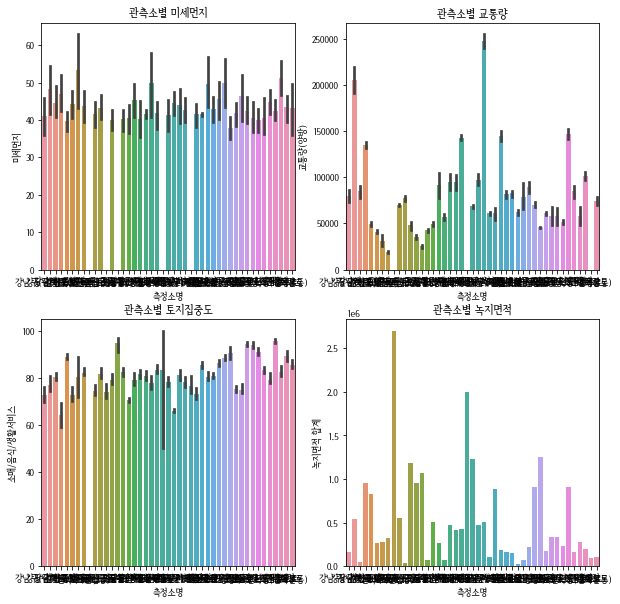

In [20]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(10,10)
sns.barplot(x="측정소명",y="미세먼지", data = river,ax=ax1)
sns.barplot(x="측정소명",y="교통량(양방)", data = river,ax=ax2)
sns.barplot(x="측정소명",y="소매/음식/생활서비스", data = river,ax=ax3)
sns.barplot(x="측정소명",y="녹지면적 합계", data = river,ax=ax4)
ax1.set(title = "관측소별 미세먼지")
ax2.set(title = "관측소별 교통량")
ax3.set(title = "관측소별 토지집중도")
ax4.set(title = "관측소별 녹지면적")

[Text(0.5, 1.0, '관측소별 녹지면적')]

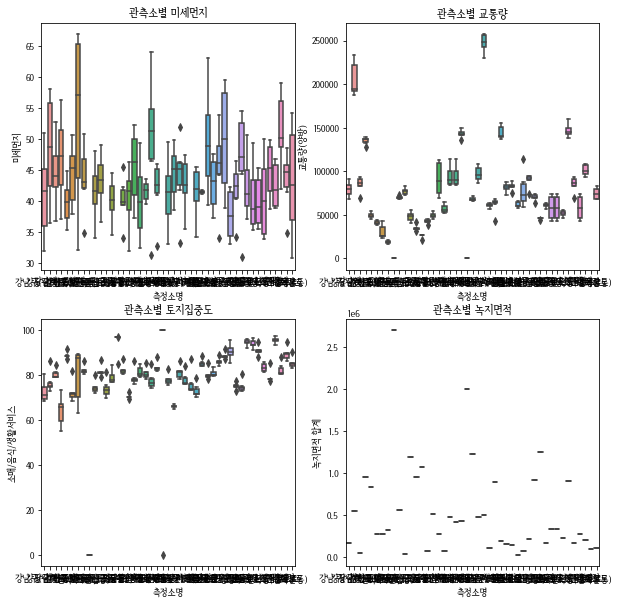

In [21]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(10,10)

sns.boxplot(x="측정소명",y="미세먼지", data = river,ax=ax1)
sns.boxplot(x="측정소명",y="교통량(양방)", data = river,ax=ax2)
sns.boxplot(x="측정소명",y="소매/음식/생활서비스", data = river,ax=ax3)
sns.boxplot(x="측정소명",y="녹지면적 합계", data = river,ax=ax4)
ax1.set(title = "관측소별 미세먼지")
ax2.set(title = "관측소별 교통량")
ax3.set(title = "관측소별 토지집중도")
ax4.set(title = "관측소별 녹지면적")

<AxesSubplot:xlabel='측정소명', ylabel='미세먼지'>

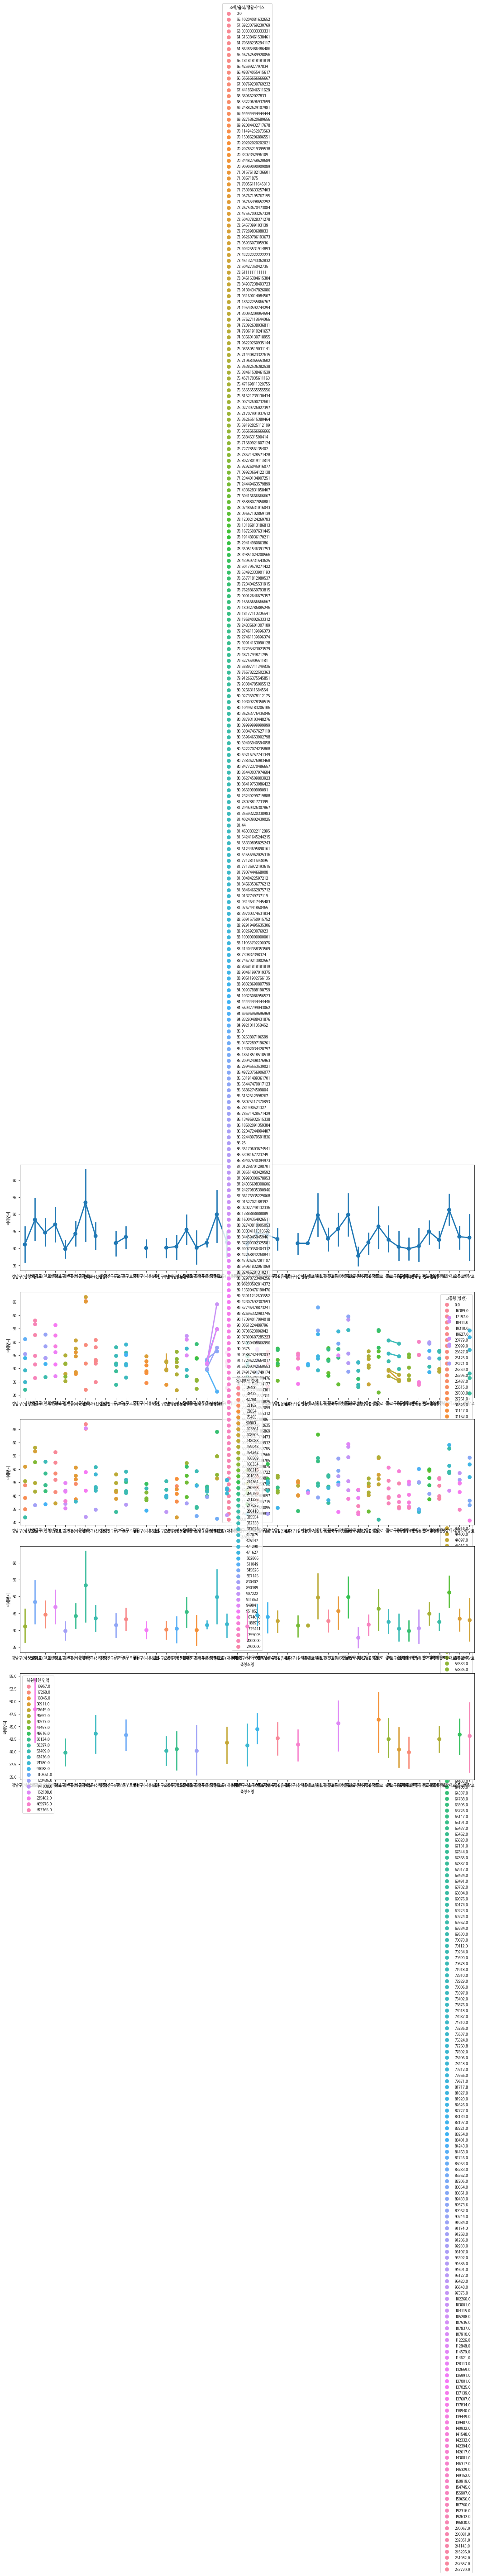

In [22]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=river,x="측정소명",y="미세먼지",ax=ax1)
sns.pointplot(data=river,x="측정소명",y="미세먼지",hue="교통량(양방)",ax=ax2)
sns.pointplot(data=river,x="측정소명",y="미세먼지",hue="소매/음식/생활서비스",ax=ax3)
sns.pointplot(data=river,x="측정소명",y="미세먼지",hue="녹지면적 합계",ax=ax4)
sns.pointplot(data=river,x="측정소명",y="미세먼지",hue="복원하천 면적",ax=ax5)

TypeError: 'Series' object cannot be interpreted as an integer

In [60]:
river["is_restore"]=river["1km내 복원하천 여부"].apply(lambda x: True if x == 1 else False)
river["is_commercial"]=river["소매/음식/생활서비스"].apply(lambda x: True if x >80  else False)


In [61]:
river.dropna( inplace=True)
print(river)

     측정소명  연도더미  2015  2016  2017  2018  2019  2020       미세먼지  소매/음식/생활서비스  \
6    강남대로     1     1     0     0     0     0     0  52.712329    76.929260   
7    강남대로     2     0     1     0     0     0     0  58.081967    74.798619   
8    강남대로     0     0     0     1     0     0     0  56.794521    72.772898   
9    강남대로     3     0     0     0     1     0     0  44.780822    75.086505   
10   강남대로     4     0     0     0     0     1     0  41.567123    75.363825   
..    ...   ...   ...   ...   ...   ...   ...   ...        ...          ...   
264   화랑로     1     1     0     0     0     0     0  47.052055    83.414044   
265   화랑로     2     0     1     0     0     0     0  54.308743    85.497238   
267   화랑로     3     0     0     0     1     0     0  36.553425    85.185185   
268   화랑로     4     0     0     0     0     1     0  38.180822    85.209424   
269   화랑로     5     0     0     0     0     0     1  30.762295    90.306122   

     ...  0  1  2  3  4  5  0  1  is_restore  is_co

In [64]:
river.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 6 to 269
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   측정소명              111 non-null    object 
 1   연도더미              111 non-null    int64  
 2   2015              111 non-null    int64  
 3   2016              111 non-null    int64  
 4   2017              111 non-null    int64  
 5   2018              111 non-null    int64  
 6   2019              111 non-null    int64  
 7   2020              111 non-null    int64  
 8   미세먼지              111 non-null    float64
 9   소매/음식/생활서비스       111 non-null    float64
 10  소매(범위)            111 non-null    int64  
 11  음식(범위)            111 non-null    int64  
 12  생활서비스(범위)         111 non-null    int64  
 13  합계 범위             111 non-null    int64  
 14  교통량(양방)           111 non-null    float64
 15  1km내 복원하천 여부      111 non-null    int64  
 16  총녹지면적             111 non-null    int64  
 1

In [65]:
restore_effect = CausalModel(
    data=river,
    treatment = "is_restore",
    outcome = "미세먼지",
    common_causes = "교통량(양방)+소매/음식/생활서비스+녹지면적 합계+연도더미+평균기온+평균풍속+강수량합".split("+"),
    proceed_when_unidentifiable=True
)

In [67]:
restore_identified = restore_effect.identify_effect()

restore_matching = restore_effect.estimate_effect(restore_identified,method_name = "backdoor.propensity_score_matching")
#restore_stratify = restore_effect.estimate_effect(restore_identified,method_name = "backdoor.propensity_score_stratification")

print("Causal Estimate of Matching: {}".format(restore_matching.value))
#print("Causal Estimate of Stratification: {}".format(restore_stratify.value))

C:\YCL\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Causal Estimate of Matching: -0.1044862052710895


In [70]:
#모디파이어 고려(트리트먼트와 결과에 동시에 영향을 주는 요소)
mass_effect = CausalModel(
    data=river,
    treatment = "is_restore",
    outcome = "미세먼지",
    common_causes = "교통량(양방)+소매/음식/생활서비스+녹지면적 합계+연도더미+평균기온+평균풍속+강수량합".split("+"),
    effect_modifiers = "복원하천 면적",
    proceed_when_unidentifiable=True
)

In [71]:
mass_identified = mass_effect.identify_effect()

mass_matching = mass_effect.estimate_effect(mass_identified,method_name = "backdoor.propensity_score_matching")
#mass_stratify = mass_effect.estimate_effect(mass_identified,method_name = "backdoor.propensity_score_stratification")

print("Causal Estimate of Matching: {}".format(mass_matching.value))
#print("Causal Estimate of Stratification: {}".format(mass_stratify.value))

C:\YCL\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Causal Estimate of Matching: -0.1044862052710895


In [ ]:
# 1. 무관한 교란변수 생성
restore_random    = restore_effect.refute_estimate(restore_identified, restore_matching,method_name="random_common_cause")
# 2. 가짜 처리 생성
restore_placebo   = restore_effect.refute_estimate(restore_identified, restore_matching,method_name="placebo_treatment_refuter", placebo_type="permute")
# 3. 일부만 추출(서브셋 변경할것)
restore_subset    = restore_effect.refute_estimate(restore_identified, restore_matching,method_name="data_subset_refuter", subset_fraction=0.8)

restore_random_str    = restore_effect.refute_estimate(restore_identified, restore_stratify,method_name="random_common_cause")
restore_placebo_str   = restore_effect.refute_estimate(restore_identified, restore_stratify,method_name="placebo_treatment_refuter", placebo_type="permute")
restore_subset_str    = restore_effect.refute_estimate(restore_identified, restore_stratify,method_name="data_subset_refuter", subset_fraction=0.8)

In [ ]:
print(restore_random)
print(restore_placebo)
print(restore_subset)

print(restore_random_str)
print(restore_placebo_str)
print(restore_subset_str)

In [ ]:
identified_estimand = model.identify_effect()

In [ ]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
# Plot Slope of line between treamtent and outcome =causal effect
dowhy.plotter.plot_causal_effect(estimate, df[data_dict["treatment_name"]], df[data_dict["outcome_name"]])